In [1]:
import os, pandas as pd
import numpy as np,seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats as stats
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [2]:
os.chdir('C:\\Users\\yashi')

In [3]:
df=pd.read_csv("Mobile_data.csv")

In [4]:
df

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19,0
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16,2
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5,3
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19,0


In [5]:
df.isnull().sum()

battery_power    0
clock_speed      0
fc               0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
price_range      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   clock_speed    2000 non-null   float64
 2   fc             2000 non-null   int64  
 3   int_memory     2000 non-null   int64  
 4   m_dep          2000 non-null   float64
 5   mobile_wt      2000 non-null   int64  
 6   n_cores        2000 non-null   int64  
 7   pc             2000 non-null   int64  
 8   px_height      2000 non-null   int64  
 9   px_width       2000 non-null   int64  
 10  ram            2000 non-null   int64  
 11  sc_h           2000 non-null   int64  
 12  sc_w           2000 non-null   int64  
 13  talk_time      2000 non-null   int64  
 14  price_range    2000 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 234.5 KB


In [7]:
df.describe(percentiles=[.01,.02,.03,.04,.05,.25,.75,.9,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
battery_power,2000.0,1238.51850,439.418206,501.0,510.00,524.96,538.97,556.92,570.95,851.75,1226.0,1615.25,1851.0,1930.15,1946.08,1961.06,1974.00,1987.00,1998.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.50,0.50,0.50,0.50,0.50,0.70,1.5,2.20,2.7,2.80,2.90,2.90,2.90,3.00,3.0
fc,2000.0,4.30950,4.341444,0.0,0.00,0.00,0.00,0.00,0.00,1.00,3.0,7.00,11.0,13.00,14.00,15.00,16.00,16.00,19.0
int_memory,2000.0,32.04650,18.145715,2.0,2.00,2.00,3.00,4.00,5.00,16.00,32.0,48.00,57.0,61.00,62.00,63.00,63.00,64.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.10,0.10,0.10,0.10,0.10,0.20,0.5,0.80,0.9,1.00,1.00,1.00,1.00,1.00,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,80.00,82.00,83.00,84.00,86.00,109.00,141.0,170.00,189.0,196.00,197.00,198.00,199.00,199.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,1.00,1.00,1.00,1.00,1.00,3.00,4.0,7.00,8.0,8.00,8.00,8.00,8.00,8.00,8.0
pc,2000.0,9.91650,6.064315,0.0,0.00,0.00,0.00,0.00,0.00,5.00,10.0,15.00,18.0,20.00,20.00,20.00,20.00,20.00,20.0
px_height,2000.0,645.10800,443.780811,0.0,15.00,30.98,45.97,58.00,70.95,282.75,564.0,947.25,1285.0,1485.05,1568.04,1618.03,1698.00,1791.01,1960.0
px_width,2000.0,1251.51550,432.199447,500.0,512.99,526.96,542.00,562.00,579.85,874.75,1247.0,1633.00,1854.0,1929.05,1947.00,1963.00,1974.00,1987.00,1998.0


### Univariate Analysis

In [8]:
df[(df["pc"]==0)&(df["fc"]==0)].shape

(101, 15)

#### There are mobile which do not both have front and back camera  

In [9]:
df[(df["pc"]==0)&(df["fc"]==0)&(df["px_height"]!=0)&(df["px_width"]!=0)].shape

(101, 15)

### Univariate for Numerical

In [10]:

def univariate_num(data,x):
    missing=data[x].isnull().sum()
    min1=round(data[x].min(),2)
    max1=round(data[x].max(),2)
    mean=round(data[x].mean(),2)
    var=round(data[x].var(),2)
    std=round(data[x].std(),2)
    range1=round(max1-min1,2)
    q1=round(data[x].quantile(.25),2)
    q2=round(data[x].quantile(.50),2)
    q3=round(data[x].quantile(.75),2)
    skew=round(data[x].skew(),2)
    kurt=round(data[x].kurt(),2)
    myvalue={"missing" : missing,"min" : min1,"max" : max1,"mean" : mean,"var" : var, "std" : std,"range" : range1,
             "q1" : q1,"q2" : q2,"q3" : q3,"skewness" : skew,"Kurtosis" : kurt}
    sns.histplot(data[x],kde=True)
    plt.show()
    sns.boxplot(data=data,y=data[x])
    plt.show()
    return myvalue

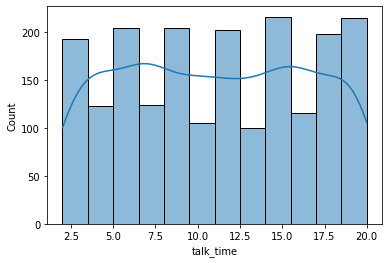

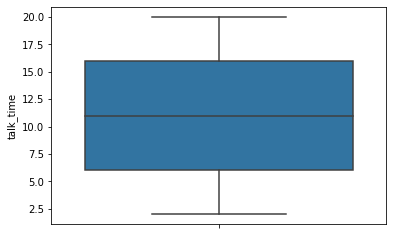

{'missing': 0,
 'min': 2,
 'max': 20,
 'mean': 11.01,
 'var': 29.85,
 'std': 5.46,
 'range': 18,
 'q1': 6.0,
 'q2': 11.0,
 'q3': 16.0,
 'skewness': 0.01,
 'Kurtosis': -1.22}

In [11]:
univariate_num(df,"talk_time")

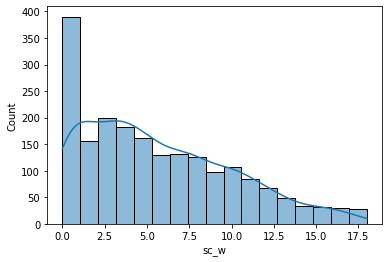

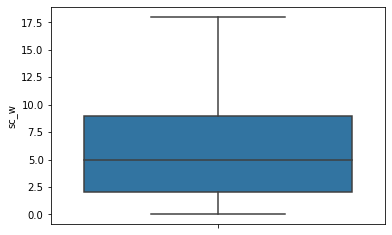

{'missing': 0,
 'min': 0,
 'max': 18,
 'mean': 5.77,
 'var': 18.98,
 'std': 4.36,
 'range': 18,
 'q1': 2.0,
 'q2': 5.0,
 'q3': 9.0,
 'skewness': 0.63,
 'Kurtosis': -0.39}

In [12]:
univariate_num(df,"sc_w")

* Can not be 0
* lets treat it 

In [13]:
180/2000

0.09

In [14]:
df["sc_w"]=df["sc_w"].replace([0],np.nan)

In [15]:
df["sc_w"].isnull().sum()

180

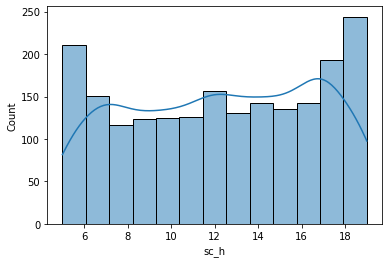

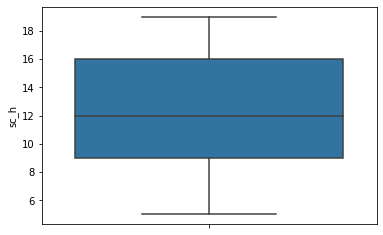

{'missing': 0,
 'min': 5,
 'max': 19,
 'mean': 12.31,
 'var': 17.75,
 'std': 4.21,
 'range': 14,
 'q1': 9.0,
 'q2': 12.0,
 'q3': 16.0,
 'skewness': -0.1,
 'Kurtosis': -1.19}

In [16]:
univariate_num(df,"sc_h")

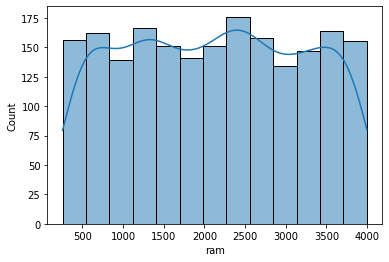

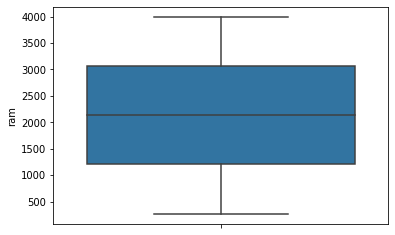

{'missing': 0,
 'min': 256,
 'max': 3998,
 'mean': 2124.21,
 'var': 1176643.61,
 'std': 1084.73,
 'range': 3742,
 'q1': 1207.5,
 'q2': 2146.5,
 'q3': 3064.5,
 'skewness': 0.01,
 'Kurtosis': -1.19}

In [17]:
univariate_num(df,"ram")

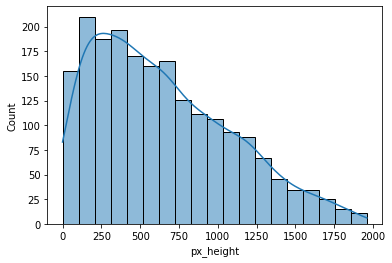

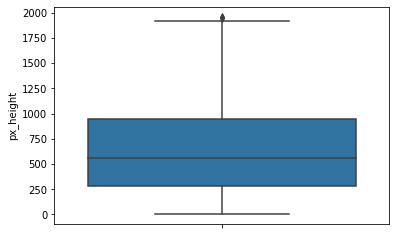

{'missing': 0,
 'min': 0,
 'max': 1960,
 'mean': 645.11,
 'var': 196941.41,
 'std': 443.78,
 'range': 1960,
 'q1': 282.75,
 'q2': 564.0,
 'q3': 947.25,
 'skewness': 0.67,
 'Kurtosis': -0.32}

In [18]:
univariate_num(df,"px_height")

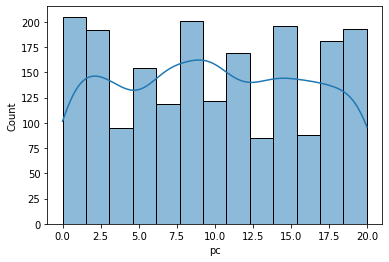

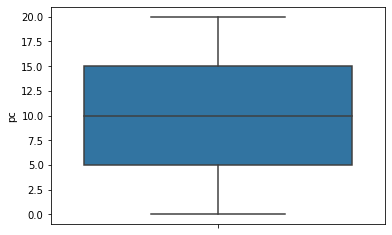

{'missing': 0,
 'min': 0,
 'max': 20,
 'mean': 9.92,
 'var': 36.78,
 'std': 6.06,
 'range': 20,
 'q1': 5.0,
 'q2': 10.0,
 'q3': 15.0,
 'skewness': 0.02,
 'Kurtosis': -1.17}

In [19]:
univariate_num(df,"pc")

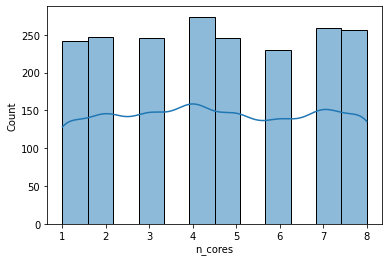

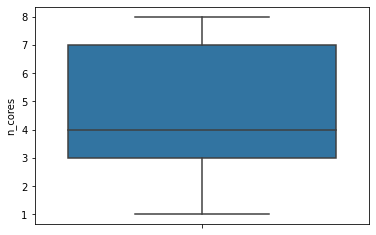

{'missing': 0,
 'min': 1,
 'max': 8,
 'mean': 4.52,
 'var': 5.23,
 'std': 2.29,
 'range': 7,
 'q1': 3.0,
 'q2': 4.0,
 'q3': 7.0,
 'skewness': 0.0,
 'Kurtosis': -1.23}

In [20]:
univariate_num(df,"n_cores")

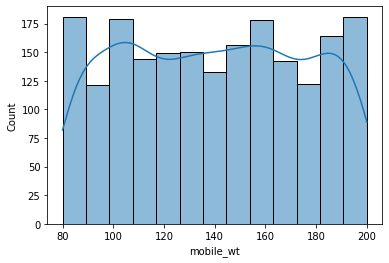

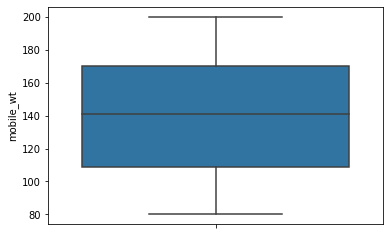

{'missing': 0,
 'min': 80,
 'max': 200,
 'mean': 140.25,
 'var': 1253.14,
 'std': 35.4,
 'range': 120,
 'q1': 109.0,
 'q2': 141.0,
 'q3': 170.0,
 'skewness': 0.01,
 'Kurtosis': -1.21}

In [21]:
univariate_num(df,"mobile_wt")

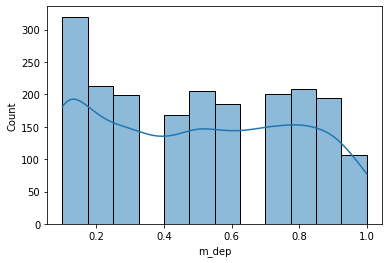

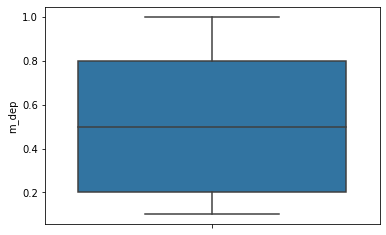

{'missing': 0,
 'min': 0.1,
 'max': 1.0,
 'mean': 0.5,
 'var': 0.08,
 'std': 0.29,
 'range': 0.9,
 'q1': 0.2,
 'q2': 0.5,
 'q3': 0.8,
 'skewness': 0.09,
 'Kurtosis': -1.27}

In [22]:
univariate_num(df,"m_dep")

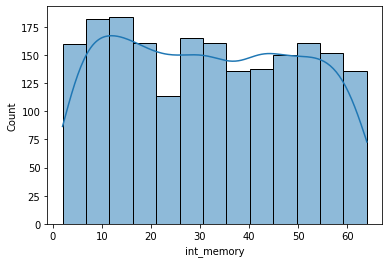

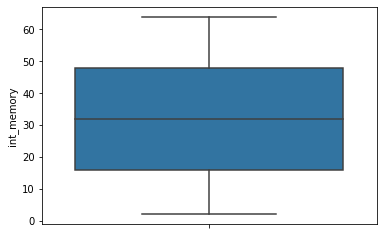

{'missing': 0,
 'min': 2,
 'max': 64,
 'mean': 32.05,
 'var': 329.27,
 'std': 18.15,
 'range': 62,
 'q1': 16.0,
 'q2': 32.0,
 'q3': 48.0,
 'skewness': 0.06,
 'Kurtosis': -1.22}

In [23]:
univariate_num(df,"int_memory")

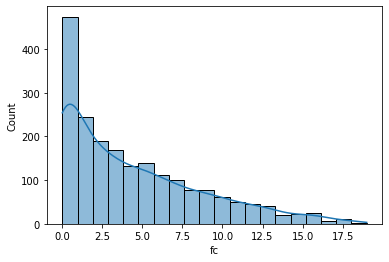

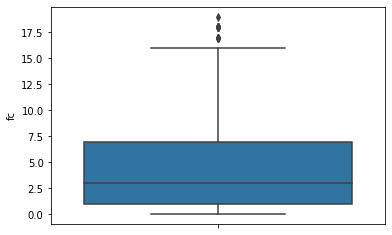

{'missing': 0,
 'min': 0,
 'max': 19,
 'mean': 4.31,
 'var': 18.85,
 'std': 4.34,
 'range': 19,
 'q1': 1.0,
 'q2': 3.0,
 'q3': 7.0,
 'skewness': 1.02,
 'Kurtosis': 0.28}

In [24]:
univariate_num(df,"fc")

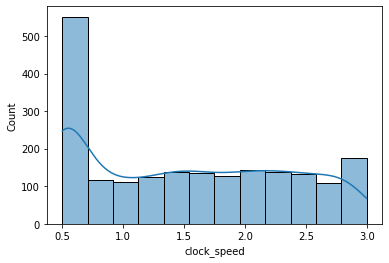

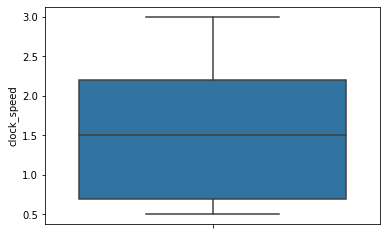

{'missing': 0,
 'min': 0.5,
 'max': 3.0,
 'mean': 1.52,
 'var': 0.67,
 'std': 0.82,
 'range': 2.5,
 'q1': 0.7,
 'q2': 1.5,
 'q3': 2.2,
 'skewness': 0.18,
 'Kurtosis': -1.32}

In [25]:
univariate_num(df,"clock_speed")

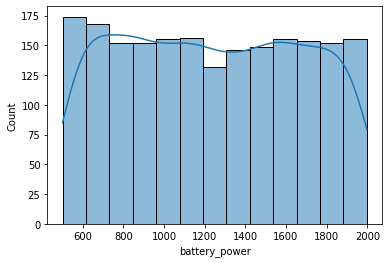

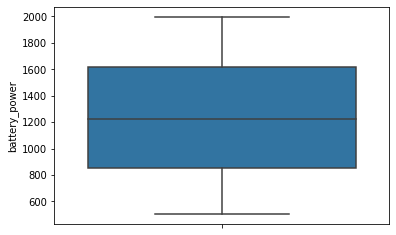

{'missing': 0,
 'min': 501,
 'max': 1998,
 'mean': 1238.52,
 'var': 193088.36,
 'std': 439.42,
 'range': 1497,
 'q1': 851.75,
 'q2': 1226.0,
 'q3': 1615.25,
 'skewness': 0.03,
 'Kurtosis': -1.22}

In [26]:
univariate_num(df,"battery_power")

# Univariate cat

In [27]:
df.dtypes

battery_power      int64
clock_speed      float64
fc                 int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w             float64
talk_time          int64
price_range        int64
dtype: object

In [28]:
def univariate_cat(data,x): 
    missing=data[x].isnull().sum() 
    unique_cnt=data[x].nunique() 
    unique_cat=list(data[x].unique()) 
    f1=pd.DataFrame(data[x].value_counts()) 
    f1.rename(columns={x:'count'},inplace=True) 
    f2=pd.DataFrame(data[x].value_counts(normalize=True)) 
    f2.rename(columns={x:'percentage'},inplace=True) 
    f2['percentage']=(f2['percentage']*100).round(2).astype(str)+'%' 
    ff=pd.concat([f1,f2],axis=1) 
    print(f"Total missing values : {missing}\n") 
    print(f"Total count of unique categories: {unique_cnt}\n") 
    print(f"Unique categories :\n{unique_cat}") 
    print(f'Value count and %\n:',ff)
    sns.countplot(data=data,x=x)
    plt.show()

Total missing values : 0

Total count of unique categories: 4

Unique categories :
[1, 2, 3, 0]
Value count and %
:    count percentage
1    500      25.0%
2    500      25.0%
3    500      25.0%
0    500      25.0%


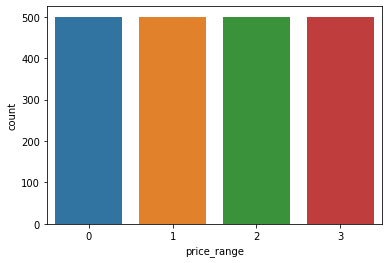

In [29]:
univariate_cat(df,"price_range")

# Missing Values Treatment

In [30]:
df.isnull().sum()

battery_power      0
clock_speed        0
fc                 0
int_memory         0
m_dep              0
mobile_wt          0
n_cores            0
pc                 0
px_height          0
px_width           0
ram                0
sc_h               0
sc_w             180
talk_time          0
price_range        0
dtype: int64

In [31]:
df.fillna(value=df['sc_w'].mean(), inplace=True)

In [32]:
df.isnull().sum()

battery_power    0
clock_speed      0
fc               0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
price_range      0
dtype: int64

<AxesSubplot:xlabel='price_range'>

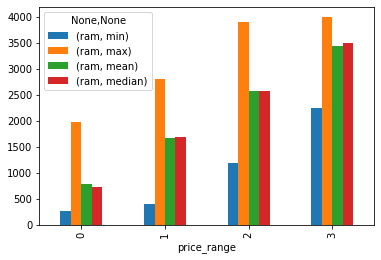

In [33]:
df.groupby(["price_range"]).agg({"ram":["min","max","mean","median"]}).plot(kind="bar")

<AxesSubplot:xlabel='price_range'>

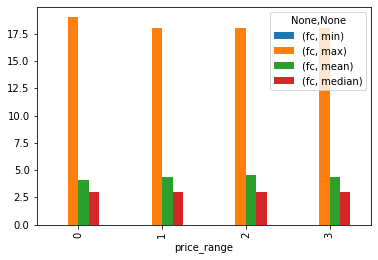

In [34]:
df.groupby(["price_range"]).agg({"fc":["min","max","mean","median"]}).plot(kind="bar")

# DecisionTree

In [35]:
y=df["price_range"]
x=df.drop(["price_range"],axis=1)

In [36]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.3,random_state=88) 

In [37]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
print("Train accuracy",dt.score(x_train,y_train))
print("Test accuracy",dt.score(x_test,y_test))

Train accuracy 1.0
Test accuracy 0.8316666666666667


In [38]:
from sklearn.model_selection import GridSearchCV
params={"criterion":["gini","entropy"],
       "max_depth":[5,7,9,11,14],
       "min_samples_split":[10,15,20,50,100,200,250],
       "min_samples_leaf":[5,10,15,20,50,80,100]}
dtg=DecisionTreeClassifier()
gd_search=GridSearchCV(estimator=dtg,param_grid=params,cv=10,n_jobs=-1,verbose=2)
gd_search.fit(x_train,y_train)

Fitting 10 folds for each of 490 candidates, totalling 4900 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 9, 11, 14],
                         'min_samples_leaf': [5, 10, 15, 20, 50, 80, 100],
                         'min_samples_split': [10, 15, 20, 50, 100, 200, 250]},
             verbose=2)

In [39]:
gd_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=14, min_samples_leaf=5,
                       min_samples_split=10)

In [40]:
gd_search.best_params_

{'criterion': 'entropy',
 'max_depth': 14,
 'min_samples_leaf': 5,
 'min_samples_split': 10}

In [41]:
dt_f=DecisionTreeClassifier(criterion='entropy', max_depth=14, min_samples_leaf=5,
                       min_samples_split=10)
dt_f.fit(x_train,y_train)
print("Train_accuracy",dt_f.score(x_train,y_train))
print("Test_accuracy",dt_f.score(x_test,y_test))

Train_accuracy 0.9564285714285714
Test_accuracy 0.86


### knn

In [44]:
y = df["price_range"]
x = df.drop(["price_range"],axis=1)

In [45]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.3,random_state=88) 

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
knn1=KNeighborsClassifier()
knn1.fit(x_train,y_train)

KNeighborsClassifier()

In [49]:
print("Train_accuracy",knn1.score(x_train,y_train))
print("Test_accuracy",knn1.score(x_test,y_test))

Train_accuracy 0.9521428571428572
Test_accuracy 0.9183333333333333


In [58]:
k1 = [3,5,7,9,11,13,15,17,19,21]
p = [1,2,3]
train = []
test = []

for i in k1:
    for j in p:
        knn2= KNeighborsClassifier(n_neighbors=i , p=j)
        knn2.fit(x_train,y_train)
        train_ac = knn2.score(x_train,y_train)
        test_ac = knn2.score(x_test,y_test)
        train.append(train_ac)
        test.append(test_ac)
        print(f"for k = {i} and p = {j}, Train accuracy = {train_ac} and test accuracy = {test_ac}")
       

for k = 3 and p = 1, Train accuracy = 0.9657142857142857 and test accuracy = 0.9016666666666666
for k = 3 and p = 2, Train accuracy = 0.9592857142857143 and test accuracy = 0.9066666666666666
for k = 3 and p = 3, Train accuracy = 0.9585714285714285 and test accuracy = 0.9083333333333333
for k = 5 and p = 1, Train accuracy = 0.9535714285714286 and test accuracy = 0.9116666666666666
for k = 5 and p = 2, Train accuracy = 0.9521428571428572 and test accuracy = 0.9183333333333333
for k = 5 and p = 3, Train accuracy = 0.9485714285714286 and test accuracy = 0.9233333333333333
for k = 7 and p = 1, Train accuracy = 0.9457142857142857 and test accuracy = 0.925
for k = 7 and p = 2, Train accuracy = 0.9507142857142857 and test accuracy = 0.9316666666666666
for k = 7 and p = 3, Train accuracy = 0.9535714285714286 and test accuracy = 0.9166666666666666
for k = 9 and p = 1, Train accuracy = 0.9485714285714286 and test accuracy = 0.9283333333333333
for k = 9 and p = 2, Train accuracy = 0.9535714285714

In [59]:
dfg = []
for i in k1:
    for j in p:
        l=str(i)+"-"+str(j)
        dfg.append(l)

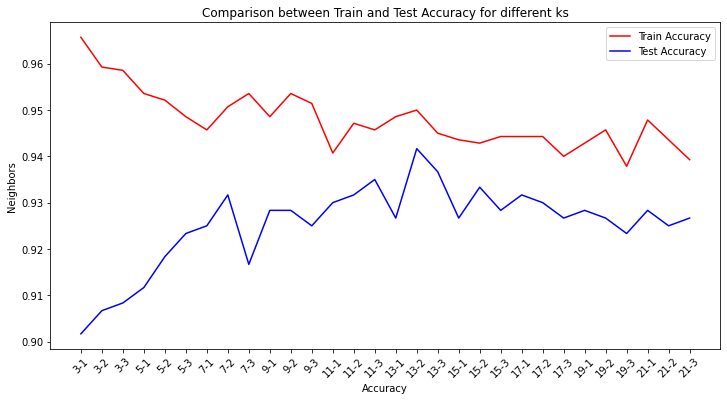

In [61]:
plt.figure(figsize=(12,6))
plt.plot(dfg, train, label='Train Accuracy', color='r')
plt.plot(dfg, test, label='Test Accuracy', color='b')
plt.title("Comparison between Train and Test Accuracy for different ks")
plt.xlabel("Accuracy")
plt.ylabel("Neighbors")
plt.legend()
plt.xticks(rotation=45)
plt.show()

from above graph, we can conclude that at k=13, the difference between accuracy is min

In [63]:
knn3 = KNeighborsClassifier(n_neighbors= 13, p=2 )
knn3.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [64]:
print("Train_accuracy",knn3.score(x_train,y_train))
print("Test_accuracy",knn3.score(x_test,y_test))

Train_accuracy 0.95
Test_accuracy 0.9416666666666667


In [67]:
from sklearn import metrics 
def classification_eva(act,pred,probs):
    ac1=metrics.accuracy_score(act,pred)
    rc1=metrics.recall_score(act,pred)
    pc1=metrics.precision_score(act,pred)
    f1=metrics.f1_score(act,pred)
    auc1=metrics.roc_auc_score(act,pred)
    result={'Accuracy':ac1, 'Recall':rc1, 'Precision': pc1, 'F1 score': f1, 'AUC':auc1}
    
    fpr, tpr, thresholds=metrics.roc_curve(act,probs)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr)
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.show()
    return result

In [68]:
pred_train = knn3.predict(x_train)
pred_test = knn3.predict(x_test)

prob_train= knn3.predict_proba(x_train)[:,1]
prob_test= knn3.predict_proba(x_test)[:,1]

In [69]:
cm = metrics.confusion_matrix(y_train, pred_train)
pd.DataFrame(cm,columns = ["Pred_low", "Pred_Median", "Pred_High", " Pred_VeryHigh"],
            index = ["Act_low", "Act_Median", "Act_High", "Act _VeryHigh"])

,Pred_low,Pred_Median,Pred_High,Pred_VeryHigh
Act_low,342,6,0,0
Act_Median,8,330,8,0
Act_High,0,19,326,7
Act _VeryHigh,0,0,22,332


In [70]:
cm = metrics.confusion_matrix(y_test, pred_test)
pd.DataFrame(cm,columns = ["Pred_low", "Pred_Median", "Pred_High", " Pred_VeryHigh"],
            index = ["Act_low", "Act_Median", "Act_High", "Act _VeryHigh"])

,Pred_low,Pred_Median,Pred_High,Pred_VeryHigh
Act_low,150,2,0,0
Act_Median,6,140,8,0
Act_High,0,5,138,5
Act _VeryHigh,0,0,9,137


In [71]:
print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       348
           1       0.93      0.95      0.94       346
           2       0.92      0.93      0.92       352
           3       0.98      0.94      0.96       354

    accuracy                           0.95      1400
   macro avg       0.95      0.95      0.95      1400
weighted avg       0.95      0.95      0.95      1400



In [72]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       152
           1       0.95      0.91      0.93       154
           2       0.89      0.93      0.91       148
           3       0.96      0.94      0.95       146

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600



In [75]:
pd.DataFrame(knn3.predict_proba(x_train))

,0,1,2,3
0,0.307692,0.692308,0.000000,0.000000
1,0.000000,0.000000,0.000000,1.000000
2,0.000000,0.000000,0.307692,0.692308
3,0.000000,0.846154,0.153846,0.000000
4,0.000000,0.000000,0.153846,0.846154
...,...,...,...,...
1395,0.692308,0.307692,0.000000,0.000000
1396,1.000000,0.000000,0.000000,0.000000
1397,0.000000,0.000000,0.000000,1.000000
1398,0.384615,0.615385,0.000000,0.000000


In [76]:
knn3.predict(x_train)

array([1, 3, 3, ..., 3, 1, 1], dtype=int64)